## 1. Data Source & Scope

* Historical hourly candlestick data (OHLCV) from:
    * link: https://www.dukascopy.com/swiss/english/marketwatch/historical/
* Time period: May 17, 2020 – May 17, 2025
* Data Format: CSV file
* Data Fields: Likely includes Date, Open, High, Low, Close, and Volume.

## 2. Loading Data

* The US30 index, also known as the **Dow Jones** Industrial Average (DJIA), tracks **30 major U.S. companies** and reflects the overall performance of the U.S. stock market.
* In this code, it represents historical **hourly (1H)** trading data used to review recent market activity.

**Part 1: Loading Hourly Candlestick Data for the US30 Index Using Pandas**

In [ ]:
# Install the pandas library using pip
!pip install pandas

In [26]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Load the CSV file containing hourly Dow Jones (US30) index data into a DataFrame named 'df'
df = pd.read_csv("Dataset/USA30.IDXUSD_Candlestick_1_Hour_BID_17.05.2020-17.05.2025.csv")

**Part 2: Display the Last 5 Rows of a DataFrame in Pandas**

In [27]:
# Display the last 5 rows of the DataFrame to verify the structure and contents
df.tail()

,Local time,Open,High,Low,Close,Volume
43845,17.05.2025 19:30:00.000 GMT+0330,42617.939,42617.939,42617.939,42617.939,0.0
43846,17.05.2025 20:30:00.000 GMT+0330,42617.939,42617.939,42617.939,42617.939,0.0
43847,17.05.2025 21:30:00.000 GMT+0330,42617.939,42617.939,42617.939,42617.939,0.0
43848,17.05.2025 22:30:00.000 GMT+0330,42617.939,42617.939,42617.939,42617.939,0.0
43849,17.05.2025 23:30:00.000 GMT+0330,42617.939,42617.939,42617.939,42617.939,0.0


**Part 3: Displaying Summary Information of a DataFrame in Pandas**

In [28]:
# Print a concise summary of the DataFrame including:
# - Number of entries (rows)
# - Column names and data types
# - Non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43850 entries, 0 to 43849
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Local time  43850 non-null  object 
 1   Open        43850 non-null  float64
 2   High        43850 non-null  float64
 3   Low         43850 non-null  float64
 4   Close       43850 non-null  float64
 5   Volume      43850 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.0+ MB


## 3. Preparing Data

The purpose of this process is to:

* Find and identify any records where the volume is zero.
* Remove those records from the data.
* Double-check to see if any zero-volume records remain afterward.
* Also check if there are any missing or empty entries left in the data.

**Part 1: Check If Any Zero Volume Are Available**

In [29]:
#Check if any zero volumes are available
indexZeros = df[ df['Volume'] == 0 ].index

# Remove all rows with zero volume directly from the DataFrame
df.drop(indexZeros , inplace=True)

# Check again to confirm no zero-volume rows remain (should return an empty DataFrame)
df.loc[(df["Volume"] == 0 )]

,Local time,Open,High,Low,Close,Volume


**Part 2: Check for Missing Values**

In [30]:
# Count the number of missing (NaN) values for each column to ensure data integrity
df.isna().sum()

Local time    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

## 4. Analyze Market Trends And Momentum

This process calculates several key indicators and trend slopes from financial market data. It adds technical analysis tools such as **ATR (Average True Range)**, **RSI (Relative Strength Index)**, **midprice average**, and **moving averages (MA)** over different time lengths. It then computes the **trend direction (slope)** of these values over recent periods to understand how prices and indicators are evolving.

**Part 1: Calculating Key Technical Indicators (ATR, RSI, Midprice, and Moving Averages)**

In [ ]:
# Install the NumPy and pandas_ta libraries using pip
!pip install numpy pandas_ta

In [31]:
# Import NumPy for numerical operations
import numpy as np

# Import pandas_ta for technical analysis indicators
import pandas_ta as ta

#df.ta.indicators()                     # (Commented) Lists all available technical indicators
#help(ta.atr)                           # (Commented) Displays help for the ATR indicator

# Add Average True Range (ATR) with a 20-period window
df['ATR'] = df.ta.atr(length=20)

# Add Relative Strength Index (RSI) with default length (14)
df['RSI'] = df.ta.rsi()

# Add Mid Price (average of high and low), here with window = 1
df['Average'] = df.ta.midprice(length=1) 

# Add Simple Moving Average with 40-period window
df['MA40'] = df.ta.sma(length=40)

 # Add Simple Moving Average with 80-period window
df['MA80'] = df.ta.sma(length=80)

# Add Simple Moving Average with 160-period window
df['MA160'] = df.ta.sma(length=160)

**Part 2: Calculate the Slope of a Linear Trend in a Numerical Array Using Linear Regression**

In [32]:
# Import linear regression function from SciPy
from scipy.stats import linregress

# Define function to calculate slope of a given array
def get_slope(array):
    y = np.array(array)     # Convert the input to a NumPy array
    x = np.arange(len(y))   # Create an array [0, 1, 2, ..., len(y)-1]
    # Perform linear regression between x and y to compute the slope
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope            # Return only the slope value

**Part 3: Calculating Rolling Slopes of Moving Averages and RSI over a Fixed Window**

In [33]:
# Define the number of periods (bars) for the slope calculation
backrollingN = 6

# Calculate slope of 40-period MA over a rolling 6-bar window
df['slopeMA40'] = df['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)

# Calculate slope of 80-period MA over a rolling 6-bar window
df['slopeMA80'] = df['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)

# Calculate slope of 160-period MA over a rolling 6-bar window
df['slopeMA160'] = df['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)

# Calculate slope of the Mid Price over a rolling 6-bar window
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)

# Calculate slope of RSI over a rolling 6-bar window
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

**Part 4: Display the Last 5 Rows of a DataFrame in Pandas**

In [34]:
# Display the last 5 rows to inspect new columns added above
df.tail()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
43821,16.05.2025 19:30:00.000 GMT+0330,42323.427,42527.915,42314.927,42523.487,0.9749,83.243046,69.575268,42421.421,42162.5486,42164.29310,41900.272175,9.150894,0.878420,8.096135,-8.561771,-1.582457
43822,16.05.2025 20:30:00.000 GMT+0330,42523.903,42584.951,42511.927,42537.903,0.9436,82.732093,70.324320,42548.439,42178.9724,42167.23845,41908.773425,11.149843,1.373987,8.158791,25.930286,1.504896
43823,16.05.2025 21:30:00.000 GMT+0330,42537.403,42649.987,42528.927,42616.427,0.8713,84.648489,74.069241,42589.457,42197.7105,42171.38005,41918.241725,13.712849,2.160707,8.402947,59.120571,3.554013
43824,16.05.2025 22:30:00.000 GMT+0330,42615.951,42668.475,42585.475,42643.499,1.0730,84.566064,75.229818,42626.975,42216.7870,42175.56675,41927.765000,16.300209,2.990166,8.836827,67.177086,4.260555
43825,16.05.2025 23:30:00.000 GMT+0330,42644.199,42644.199,42602.903,42617.939,0.1211,82.402561,71.955306,42623.551,42235.3626,42178.59065,41937.385225,18.011680,3.511501,9.257251,58.558571,3.014987


## 5. Target categories

This code looks ahead a few bars and checks if prices moved mostly up, down, or stayed unclear by comparing future highs and lows to the next open price. It then labels each bar as an **uptrend** (2), **downtrend** (1), or **no trend** (0) to help decide the market direction.

In [36]:
#Target flexible way
pipdiff = 100                                            # Define profit target in pips (100 pips)
SLTPRatio = 2                                            # pipdiff/Ratio gives SL

def mytarget(barsupfront, df1):                          # Custom function to classify future trend
    length = len(df1)                                    # Total number of records
    high = list(df1['High'])                             # Convert 'High' column to a list
    low = list(df1['Low'])                               # Convert 'Low' column to a list
    close = list(df1['Close'])                           # Convert 'Close' column to a list
    open = list(df1['Open'])                             # Convert 'Open' column to a list
    trendcat = [None] * length                           # Initialize target trend list with None
    
    for line in range (0,length-barsupfront-2):          # Iterate over rows with a look-ahead buffer
        valueOpenLow = 0                                 # Initialize max drop from open
        valueOpenHigh = 0                                # Initialize max rise from open
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]            # Downward movement from open
            value2 = open[line+1]-high[line+i]           # Upward movement from open
            valueOpenLow = max(value1, valueOpenLow)     # Track max drop
            valueOpenHigh = min(value2, valueOpenHigh)   # Track max rise

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1                       # Downtrend condition met
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2                       # Uptrend condition met
                break
            else:
                trendcat[line] = 0                       # Neither trend condition met (no trend)
            
    return trendcat                                      # Return the full target list

# Compute the target values for a 16-bar lookahead window
df['mytarget'] = mytarget(16, df)

# Display first 5 rows with the new 'mytarget' column
df.head()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget
27,18.05.2020 02:30:00.000 GMT+0430,23656.80,23810.70,23615.71,23777.25,1.3543,NaN,NaN,23713.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
28,18.05.2020 03:30:00.000 GMT+0430,23777.71,23822.70,23766.70,23784.79,0.9840,NaN,NaN,23794.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
29,18.05.2020 04:30:00.000 GMT+0430,23784.79,23812.71,23758.27,23788.23,1.2038,NaN,NaN,23785.490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
30,18.05.2020 05:30:00.000 GMT+0430,23787.70,23837.77,23777.29,23806.24,1.3337,NaN,NaN,23807.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
31,18.05.2020 06:30:00.000 GMT+0430,23806.24,23894.50,23804.20,23875.24,0.9692,NaN,NaN,23849.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [37]:
# Call the custom target function with a 16-bar lookahead and assign result to a new column 'mytarget'
df['mytarget'] = mytarget(16, df)

# Display the first 5 rows of the DataFrame to inspect the new 'mytarget' column
df.head()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget
27,18.05.2020 02:30:00.000 GMT+0430,23656.80,23810.70,23615.71,23777.25,1.3543,NaN,NaN,23713.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
28,18.05.2020 03:30:00.000 GMT+0430,23777.71,23822.70,23766.70,23784.79,0.9840,NaN,NaN,23794.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
29,18.05.2020 04:30:00.000 GMT+0430,23784.79,23812.71,23758.27,23788.23,1.2038,NaN,NaN,23785.490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
30,18.05.2020 05:30:00.000 GMT+0430,23787.70,23837.77,23777.29,23806.24,1.3337,NaN,NaN,23807.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
31,18.05.2020 06:30:00.000 GMT+0430,23806.24,23894.50,23804.20,23875.24,0.9692,NaN,NaN,23849.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


## 6. Quick analysis example

C:\Users\yas\AppData\Local\Temp\ipykernel_1228\532070288.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_model.hist(ax = ax)


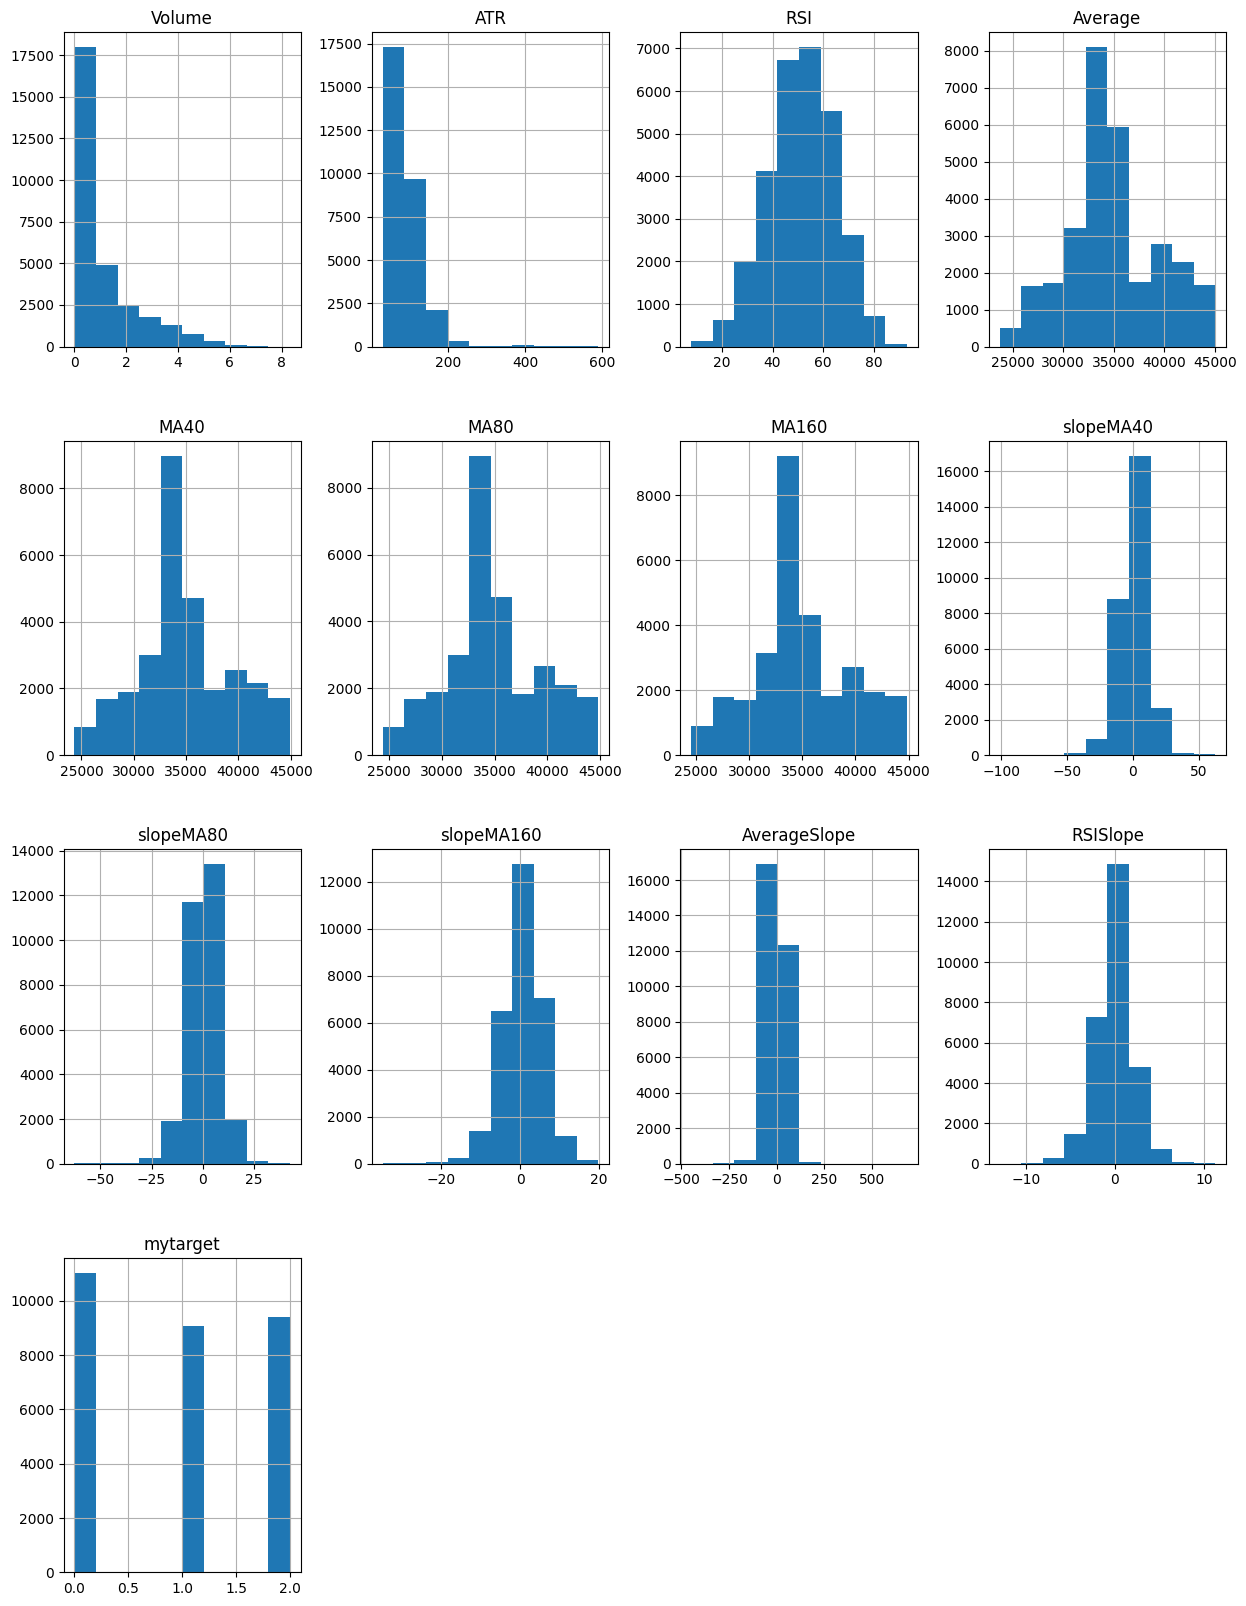

In [38]:
# Import the matplotlib plotting library
import matplotlib.pyplot as plt

# Create a new figure with specified width and height in inches
fig = plt.figure(figsize = (15,20))

# Get the current axes instance on the figure (returns a single Axes object)
ax = fig.gca()

# Select specific columns from dataframe 'df' to use in the model
df_model= df[['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 

# Attempt to plot histograms for each column on a single Axes (this will cause an error)
df_model.hist(ax = ax)

# Attempt to plot histograms for each column on a single Axes (this will cause an error)
plt.show()

## 7. Can we use the RSI alone as a trend indicator?

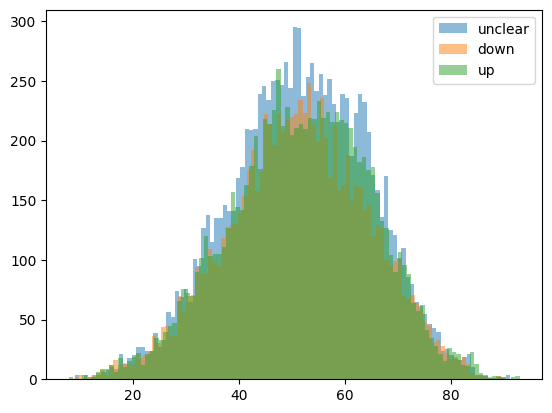

In [39]:
# Import pyplot module from matplotlib for plotting
from matplotlib import pyplot

# Select RSI values where 'mytarget' equals 2 (up category)
df_up=df.RSI[ df['mytarget'] == 2 ]

# Select RSI values where 'mytarget' equals 1 (down category)
df_down=df.RSI[ df['mytarget'] == 1 ]

# Select RSI values where 'mytarget' equals 0 (unclear category)
df_unclear=df.RSI[ df['mytarget'] == 0 ]

# Plot histogram of unclear RSI values with transparency and label
pyplot.hist(df_unclear, bins=100, alpha=0.5, label='unclear')

# Plot histogram of down RSI values with transparency and label
pyplot.hist(df_down, bins=100, alpha=0.5, label='down')

# Plot histogram of up RSI values with transparency and label
pyplot.hist(df_up, bins=100, alpha=0.5, label='up')

# Add a legend to the plot at the upper right position
pyplot.legend(loc='upper right')

# Display the plot
pyplot.show()

## 8. Machine Learning For Trend Prediction

* The perfect model with precise prediction
* Less perfect model still with > 40% precision
* Much less perfect model with precision >35% taking into account our strategy, and our TP/SL ratio
* Our target has categorical values so we need a classificator, KNN?

## 9. Splitting features and target

In [41]:
# Remove rows with any missing values from df_model
df_model=df_model.dropna()

# List of feature column names
attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']

# Create feature matrix X by selecting columns from df_model
X = df_model[attributes]

# Create target vector y from the 'mytarget' column of df_model
y = df_model["mytarget"]

# Display the feature matrix X
print(X)

             ATR        RSI    Average         MA40          MA80  \
250    78.181466  67.140532  25210.745  24944.16350  24692.904250   
251    77.244695  63.191568  25184.505  24955.26875  24700.551625   
252    80.833179  68.075053  25196.090  24967.99375  24710.117750   
253    81.117575  71.941792  25282.290  24982.67025  24720.609500   
254    83.935206  76.598542  25371.830  25000.54575  24732.124875   
...          ...        ...        ...          ...           ...   
43803  91.090353  69.054195  42335.695  42048.98780  42151.832200   
43804  87.998236  69.358178  42327.075  42053.09400  42152.843750   
43805  86.900724  64.238291  42308.439  42055.91060  42152.735950   
43806  83.905088  63.018349  42269.933  42057.99770  42153.052000   
43807  81.913433  65.102223  42281.451  42060.92050  42153.968050   

              MA160  slopeMA40  slopeMA80  slopeMA160  AverageSlope  RSISlope  
250    24560.170375  15.068379   8.808432    8.630250     43.786714  1.951786  
251    2456

In [42]:
# Import function to split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(   # Split features and target into train and test subsets
    X,                                                 # Features dataset
    y,                                                 # Target variable
    test_size=0.2,                                     # 20% of data will be used for testing
    random_state=1                                     # Set seed for reproducibility of the split
)

## 10. Fitting the KNN model

In [43]:
# Import K-Nearest Neighbors classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(   # Initialize KNN classifier with specific parameters
    n_neighbors=200,            # Use 200 nearest neighbors for classification
    weights='uniform',          # All neighbors contribute equally to the vote
    algorithm='kd_tree',        # Use kd-tree algorithm for faster nearest neighbor search
    leaf_size=30,               # Leaf size for kd-tree
    p=1,                        # Use Manhattan distance (L1 norm)
    metric='minkowski',         # Distance metric to use (Minkowski includes Manhattan and Euclidean) 
    metric_params=None,         # Additional parameters for the metric (none here) 
    n_jobs=1                    # Use one CPU core for computation
)

# Train the KNN model on the training data
model.fit(X_train, y_train)

# Predict the target values for training data
y_pred_train = model.predict(X_train)

# Predict the target values for testing data
y_pred_test = model.predict(X_test)

## 11. Quick evaluation of our fitting

In [44]:
# Import accuracy_score function to evaluate classification performance
from sklearn.metrics import accuracy_score

# Calculate accuracy on the training dataset
accuracy_train = accuracy_score(y_train, y_pred_train)

# Calculate accuracy on the testing dataset
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print training accuracy as a percentage
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))

# Print testing accuracy as a percentage
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

# ----- How should I compare my accuracy ? -------------
# Display class distribution percentages in the target column
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

# -----Random Model, gambler? --------------------------
# Generate random predictions for testing set with equal probability for each class
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))

# Calculate accuracy of random predictions
accuracy_test = accuracy_score(y_test, pred_test)

# Print gambler model accuracy as a percentage
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 40.45%
Accuracy test: 37.71%
mytarget
0.0    37.373531
2.0    31.762902
1.0    30.863567
Name: count, dtype: float64
Accuracy Gambler: 33.98%


## 12. More powerful model XGBoost

In [ ]:
# Install the XGBoost library using pip from the command line or notebook cell
!pip install xgboost

In [47]:
# Import the XGBoost classifier
from xgboost import XGBClassifier

# Initialize the XGBoost classifier with default parameters
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict labels for the training data
pred_train = model.predict(X_train)

# Predict labels for the test data
pred_test = model.predict(X_test)

# Calculate accuracy on the training data
acc_train = accuracy_score(y_train, pred_train)

# Calculate accuracy on the test data
acc_test = accuracy_score(y_test, pred_test)

 # Print header for training results
print('****Train Results****')

# Print training accuracy as a percentage
print("Accuracy: {:.4%}".format(acc_train))

# Print header for test results
print('****Test Results****')

# Print test accuracy as a percentage
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 83.5931%
****Test Results****
Accuracy: 51.7799%


## 13. Data Sampling Shouldn't Be Random

In [48]:
#random sampling
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Calculate index to split 80% of data for training
train_index = int(0.8 * len(X))

# Split features into training and testing sets sequentially
X_train, X_test = X[:train_index], X[train_index:]

# Split target into training and testing sets sequentially
y_train, y_test = y[:train_index], y[train_index:]

# Initialize the XGBoost classifier
model = XGBClassifier()

# Train the model on the sequential training data
model.fit(X_train, y_train)

# Predict labels for training data
pred_train = model.predict(X_train)

# Predict labels for testing data
pred_test = model.predict(X_test)

# Compute training accuracy
acc_train = accuracy_score(y_train, pred_train)

# Compute testing accuracy
acc_test = accuracy_score(y_test, pred_test)

# Print header for training results
print('****Train Results****')

# Print training accuracy as percentage
print("Accuracy: {:.4%}".format(acc_train))

# Print header for testing results
print('****Test Results****')

# Print testing accuracy as percentage
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 83.6016%
****Test Results****
Accuracy: 32.0899%


## 14. Which features are most important for our model?

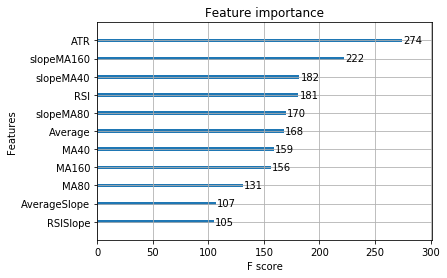

In [15]:
# Import pyplot for plotting
from matplotlib import pyplot

# Import function to plot feature importance from XGBoost
from xgboost import plot_importance

# Plot feature importance of the trained model
plot_importance(model)

# Display the plot
pyplot.show()